In [1]:
import pandas as pd
import numpy as np

In [2]:
ma_data = pd.read_json('ma_100_5.json')
df_ma_full = pd.DataFrame(ma_data['info'].tolist())
df_ma = df_ma_full.sample(1000)

In [3]:
df = [c for p in df_ma['participants'] for c in p[:10]]
df = pd.DataFrame(df)
cleaned = df.apply(lambda row: row.map(lambda x: str(x) if isinstance(x, dict) else x), axis=1)

In [4]:
cleaned.head(10)

,PlayerScore0,PlayerScore1,PlayerScore10,PlayerScore11,PlayerScore2,PlayerScore3,PlayerScore4,PlayerScore5,PlayerScore6,PlayerScore7,...,turretKills,turretTakedowns,turretsLost,unrealKills,visionClearedPings,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,0,0,0,11,0,0,8,True
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,4,0,0,0,17,0,0,9,True
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,5,0,0,0,19,0,2,10,True
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,4,0,0,0,17,2,0,11,True
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,0,0,0,47,3,6,17,True
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,11,0,0,11,0,0,6,False
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,11,0,0,7,1,0,3,False
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,11,0,0,12,0,0,7,False
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,11,0,0,18,0,3,8,False
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,11,0,0,26,0,4,10,False


In [19]:
champion = cleaned.groupby('championName').sum().reset_index()

In [20]:
champion.sort_values(by='totalDamageDealtToChampions', ascending=True, inplace=True)


<Axes: xlabel='championName'>

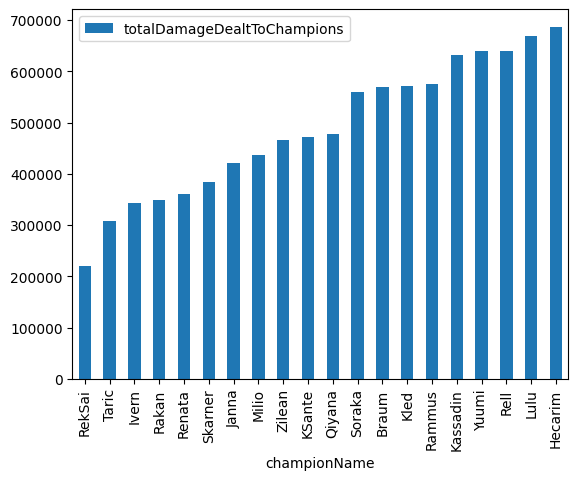

In [21]:
champion[:20].plot(x='championName', y='totalDamageDealtToChampions', kind='bar')